In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
# Catat waktu mulai
start_time = time.time()
print(f"Mulai proses pelabelan pada: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Mulai proses pelabelan pada: 2025-05-12 03:47:51


In [3]:
# 1. Baca dataset
print("Membaca dataset...")
df = pd.read_csv('translated_dataset.csv', encoding='utf-8')
print(f"Jumlah data: {len(df)}")

Membaca dataset...
Jumlah data: 14021


In [4]:
# 2. Definisikan lexicon dan kata kunci terkait kesehatan mental

# 2.1 Kata/frasa positif terkait kesadaran kesehatan mental
positive_lexicon = [
    # Kata positif terkait kesadaran kesehatan mental
    'sadar', 'aware', 'kesadaran', 'penting', 'perhatikan', 'jaga', 'rawat', 'peduli', 
    'lindungi', 'bantuan', 'dukung', 'support', 'mengerti', 'pahami', 'sembuh', 'pulih', 
    'penyembuhan', 'healing', 'sehat', 'baik', 'positif', 'tenang', 'menenangkan', 
    'seimbang', 'balance', 'harmoni', 'self care', 'merawat diri', 'self love', 
    'cinta diri', 'menerima', 'acceptance', 'berkembang', 'tumbuh', 'mindfulness', 
    'bersyukur', 'grateful', 'terapi', 'konseling', 'psikolog', 'psikiater', 
    'treatment', 'perawatan', 'pengobatan', 'solusi', 'jalan keluar', 'harapan',
    'motivasi', 'inspirasi', 'semangat', 'kuat', 'tangguh', 'resilient', 'resilien',
    'meditasi', 'yoga', 'relaksasi', 'istirahat', 'rehat', 'coping', 'adaptasi',
    'hidup sehat', 'manajemen stres', 'stress management', 'berbagi', 'cerita',
    'curhat', 'berbicara', 'diskusi', 'mendengarkan', 'empati', 'perhatian',
    # Tambahan kata positif
    'harmoni', 'damai', 'keseimbangan', 'ketenangan', 'ketabahan', 'keberanian',
    'kekuatan', 'potensi', 'fokus', 'konsentrasi', 'kontrol', 'kelola', 'atur',
    'kemampuan', 'kapasitas', 'batas', 'batasan', 'penerimaan', 'memaafkan', 'memaklumi',
    'memahami', 'membantu', 'mendukung', 'mendampingi', 'menyemangati', 'mengajak',
    'mengajarkan', 'menghargai', 'menghormati', 'menyayangi', 'mencintai'
]

# 2.2 Kata/frasa negatif terkait masalah kesehatan mental
negative_lexicon = [
    # Kata negatif terkait masalah kesehatan mental
    'stress', 'stres', 'depresi', 'cemas', 'anxiety', 'kecemasan', 'panik', 'trauma', 
    'traumatis', 'bunuh diri', 'suicide', 'putus asa', 'hopeless', 'lelah', 'burnout', 
    'kelelahan', 'sakit', 'gangguan', 'disorder', 'masalah', 'buruk', 'negatif', 
    'sedih', 'kecewa', 'marah', 'frustasi', 'frustrasi', 'takut', 'khawatir', 'gelisah',
    'tertekan', 'pressure', 'overthinking', 'terlalu mikir', 'pikiran negatif', 
    'insomnia', 'susah tidur', 'sulit tidur', 'nightmare', 'mimpi buruk', 'menyerah',
    'give up', 'menyendiri', 'isolasi', 'isolate', 'sendirian', 'kesepian', 'lonely',
    'loneliness', 'self harm', 'menyakiti diri', 'cutting', 'bipolar', 'manic', 'mania',
    'paranoid', 'paranoia', 'delusi', 'halusinasi', 'psychosis', 'psikosis',
    'schizophrenia', 'skizofrenia', 'ocd', 'obsesif', 'kompulsif', 'adhd', 'add',
    'impulsif', 'mood swing', 'perubahan mood', 'down', 'low', 'trigger', 'triggered',
    'ptsd', 'toxic', 'beracun', 'overthinking', 'insecure', 'tidak percaya diri',
    'rendah diri', 'low esteem', 'penyintas', 'korban', 'victim', 'survivor',
    'pelecehan', 'abuse', 'kekerasan', 'violence', 'bully', 'bullying', 'perundungan',
    'stigma', 'diskriminasi', 'labeling',
    # Tambahan kata negatif
    'jenuh', 'bosan', 'muak', 'jengkel', 'kesal', 'geram', 'murka', 'dendam',
    'benci', 'dengki', 'iri', 'cemburu', 'minder', 'curiga', 'paranoid', 'ragu',
    'bimbang', 'galau', 'gundah', 'resah', 'risau', 'merana', 'nestapa', 'duka',
    'pilu', 'lara', 'sakit hati', 'sakit jiwa', 'gangguan jiwa', 'gangguan pikiran',
    'gangguan mental', 'gangguan psikologis', 'gangguan psikis', 'gangguan batin'
]

# 2.3 Istilah umum terkait kesehatan mental
mental_health_terms = [
    # Istilah kesehatan mental umum
    'mental', 'kesehatan mental', 'mental health', 'wellbeing', 'kesejahteraan', 
    'pikiran', 'mind', 'otak', 'brain', 'psikologi', 'psychology', 'psikologis', 
    'psychological', 'psychiatry', 'psikiatri', 'psikiater', 'psychiatrist', 
    'psikolog', 'psychologist', 'terapi', 'therapy', 'therapeutic', 'terapeutik',
    'konseling', 'counseling', 'konselor', 'counselor', 'meditasi', 'meditation',
    'mindfulness', 'relaksasi', 'relaxation', 'napas', 'breathing', 'pernapasan',
    'emosi', 'emotion', 'emotional', 'emosional', 'perasaan', 'feeling', 'mood', 
    'affect', 'afek', 'kognitif', 'cognitive', 'kognisi', 'cognition', 'behavior',
    'perilaku', 'tingkah laku', 'cbt', 'dbt', 'act', 'psikoterapi', 'psychotherapy',
    'diagnosis', 'diagnosa', 'dsm', 'ppdgj', 'icd', 'gangguan', 'disorder', 'condition',
    'kondisi', 'psychiatry', 'psikiatri', 'medikasi', 'medication', 'obat', 'medicine',
    'pil', 'pill', 'ssri', 'snri', 'antidepresan', 'antidepressant', 'antipsikotik',
    'antipsychotic', 'stabilizer', 'stabilisator', 'neurotransmitter', 'serotonin',
    'dopamin', 'dopamine', 'norepinefrin', 'norepinephrine', 'neuron', 'synapse',
    'sinapsis', 'manic', 'manik', 'mania', 'hypomania', 'hipomania', 'dysphoria',
    'disforia', 'dysthymia', 'distimia', 'delusi', 'delusion', 'halusinasi',
    'hallucination', 'trauma', 'ptsd', 'cptsd', 'trigger', 'pemicu'
]

# 2.4 Istilah khusus Generasi Z terkait kesehatan mental
gen_z_terms = [
    'toxic', 'red flag', 'green flag', 'gaslighting', 'trauma dumping', 
    'triggered', 'trigger warning', 'tw', 'cw', 'content warning',
    'ghosting', 'breadcrumbing', 'situationship', 'fomo', 'main character energy',
    'cope', 'coping', 'self-care era', 'healing era', 'mental health check',
    'therapy tiktok', 'that girl', 'manifestasi', 'affirmations', 'journaling',
    'dopamine detox', 'doom scrolling', 'burnout', 'emotional damage',
    'emotional support', 'vibes', 'energy vampire', 'trauma bond',
    'healing journey', 'shadow work', 'icks', 'boundaries', 'validation',
    'gaslight gatekeep girlboss', 'stan culture', 'comfort character',
    'adulting', 'relateable', 'felt', 'therapy', 'medikasi'
]

# 2.5 Kontekstual kata yang lebih luas
contextual_mental_terms = [
    # Kata umum terkait perasaan/pikiran
    'perasaan', 'pikiran', 'rasa', 'batin', 'jiwa', 'diri', 'pribadi', 'hati',
    'semangat', 'motivasi', 'mood', 'energi', 'tenaga', 'lelah', 'capek',
    
    # Kata terkait stres sehari-hari
    'beban', 'tekanan', 'tugas', 'kuliah', 'kerja', 'pekerjaan', 'deadline',
    'tuntutan', 'ekspektasi', 'harapan', 'kecewa', 'gagal', 'sukses',
    
    # Kata terkait relasi sosial yang bisa memengaruhi kesehatan mental
    'teman', 'sahabat', 'pacar', 'keluarga', 'orang tua', 'hubungan',
    'konflik', 'bertengkar', 'toxic', 'support system', 'dukungan',
    
    # Kata terkait coping/mengatasi masalah
    'mengatasi', 'menghadapi', 'solusi', 'cara', 'tips', 'advice', 'saran',
    'bantuan', 'tolong', 'membantu', 'mendengarkan', 'curhat', 'berbagi',
    
    # Kata terkait self-improvement
    'berkembang', 'tumbuh', 'belajar', 'improve', 'lebih baik', 'perbaikan',
    'refleksi', 'introspeksi', 'evaluasi', 'journaling', 'meditasi'
]

In [5]:
# Tambahkan istilah Gen Z dan kontekstual ke istilah kesehatan mental
mental_health_terms.extend(gen_z_terms)
mental_health_terms.extend(contextual_mental_terms)

In [6]:
# 2.6 Hashtag terkait kesehatan mental yang sering digunakan di TikTok
mental_health_hashtags = [
    '#mentalhealth', '#mentalhealthawareness', '#kesehatan', '#kesehatanmental', 
    '#mentalhealthmatters', '#selflove', '#selfcare', '#healing', '#wellness',
    '#anxiety', '#depression', '#depresi', '#trauma', '#mentalhealthtiktok', 
    '#mentalhealthcheck', '#cemas', '#overthinking', '#therapy', '#terapi',
    '#kesehatan', '#kesejahteraan', '#mindfulness', '#mentalillness', 
    '#mentalhealthsupport', '#psychology', '#psikologi', '#wellbeing', 
    '#healingjourney', '#mentalhealthjourney', '#endthestigma',
    # Tambahan hashtag
    '#selfimprovement', '#selfdevelopment', '#personalgrowth', '#motivation',
    '#positivevibes', '#positivemindset', '#goodvibes', '#relaxation',
    '#meditation', '#breathwork', '#stressrelief', '#emotionalhealth',
    '#emotionalwellness', '#emotionalintelligence', '#emotionalregulation',
    '#emotionalsupport', '#emotionalhealing', '#emotionalrecovery',
    '#selfawareness', '#selfcompassion', '#selfacceptance', '#selfreflection'
]

# 2.7 Frasa kuat yang sangat mengindikasikan kesadaran kesehatan mental
strong_awareness_indicators = [
    'jaga kesehatan mental', 'merawat kesehatan mental', 'kesehatan mental penting',
    'mental health awareness', 'awareness', 'peduli kesehatan mental', 'sadar kesehatan mental',
    'kesadaran mental', 'terapi mental', 'konseling mental', 'psikolog', 'psikiater',
    'mencari bantuan', 'seek help', 'bantuan profesional', 'professional help',
    'self care', 'self love', 'mengurus diri', 'merawat diri', 'me time',
    'jangan malu', 'tidak perlu malu', 'no shame', 'no stigma', 'hindari stigma',
    'mental health first', 'mental health matters', 'kesehatan mental adalah prioritas',
    'lindungi pikiran', 'protect your mind', 'kesehatan mental adalah kesehatan'
]

# 2.8 Frasa-frasa terkait kesehatan mental
mental_health_phrases = [
    'jangan lupa bahagia', 'remember to smile', 'cinta diri sendiri',
    'kamu tidak sendirian', 'you are not alone', 'minta bantuan',
    'bicara dengan profesional', 'talk to someone', 'curhat', 'sharing is caring',
    'break the stigma', 'it\'s okay not to be okay', 'tidak apa-apa untuk tidak baik-baik saja',
    'take care of your mental health', 'jaga kesehatan mentalmu',
    'mental health check', 'cek kesehatan mental', 'prioritaskan dirimu',
    'prioritize yourself', 'self care day', 'your feelings are valid',
    'perasaanmu valid', 'you matter', 'kamu berharga'
]

In [8]:
# 3. Gabungkan teks asli dan ternormalisasi untuk pelabelan
print("Mempersiapkan teks untuk pelabelan...")

def combine_text_for_labeling(row):
    """Gabungkan teks asli dan ternormalisasi untuk pelabelan"""
    original = str(row['text']).lower() if isinstance(row['text'], str) else ''
    # normalized = str(row['normalized_text']).lower() if isinstance(row['normalized_text'], str) else ''
    # return f"{original} {normalized}"
    return original

df['combined_text'] = df.apply(combine_text_for_labeling, axis=1)

Mempersiapkan teks untuk pelabelan...


In [ ]:
# 4. Fungsi untuk melabeli teks berdasarkan sentimen dan kata kunci dengan kriteria yang lebih longgar
def label_by_sentiment_and_keywords_relaxed(text):
    """
    Versi yang lebih longgar untuk pelabelan "Aware"
    """
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    
    text = text.lower()
    
    # 4.1 Cek indikator kuat kesadaran kesehatan mental
    if any(indicator in text for indicator in strong_awareness_indicators):
        return 1
    
    # 4.2 Cek hashtag terkait kesehatan mental
    if any(hashtag in text for hashtag in mental_health_hashtags):
        return 1
    
    # 4.3 Cek frasa terkait kesehatan mental
    if any(phrase in text for phrase in mental_health_phrases):
        return 1
    
    # 4.4 PERUBAHAN: Cukup 1 istilah kesehatan mental saja
    if any(term in text for term in mental_health_terms):
        return 1
    
    # 4.5 Cek kombinasi kata emosional dengan kata kontekstual
    emotional_words = ['senang', 'sedih', 'marah', 'takut', 'cemas', 'khawatir', 'bahagia',
                      'frustasi', 'kecewa', 'puas', 'menyesal', 'bosan', 'lelah', 'capek',
                      'stres', 'stress', 'overthinking', 'mikir', 'pikir', 'rasa', 'merasa']
    
    if any(word in text for word in emotional_words):
        # Jika teks mengandung kata emosional DAN
        # mengandung kata dari positive_lexicon ATAU negative_lexicon
        if any(word in text for word in positive_lexicon) or any(word in text for word in negative_lexicon):
            return 1
    
    # 4.6 Cek kata-kata terkait kesehatan fisik yang bisa berhubungan dengan mental
    health_related_words = ['sehat', 'sakit', 'penyakit', 'pusing', 'sakit kepala', 
                           'migrain', 'tidur', 'insomnia', 'makan', 'nafsu makan',
                           'nutrisi', 'vitamin', 'suplemen', 'olahraga', 'exercise']
    mental_related_words = ['pikiran', 'mental', 'psikologis', 'emosi', 'perasaan', 
                           'mood', 'stres', 'cemas', 'takut', 'sedih', 'marah']
    
    if any(word in text for word in health_related_words) and any(word in text for word in mental_related_words):
        return 1
    
    # 4.7 PERUBAHAN: Jika teks menunjukkan refleksi/introspeksi diri
    reflection_words = ['refleksi', 'introspeksi', 'evaluasi', 'mengevaluasi', 'merenung',
                       'merenungkan', 'memikirkan', 'contemplating', 'berpikir tentang',
                       'berkaca', 'bercermin', 'melihat diri', 'memahami diri']
    
    if any(word in text for word in reflection_words):
        return 1
    
    # Default: tidak aware
    return 0

In [10]:
# 5. Terapkan fungsi pelabelan yang lebih longgar
print("Melabeli dataset dengan kriteria yang lebih longgar...")
df['label'] = df['combined_text'].apply(label_by_sentiment_and_keywords_relaxed)

Melabeli dataset dengan kriteria yang lebih longgar...


In [11]:
# 6. Analisis hasil pelabelan
print("\nAnalisis hasil pelabelan:")
label_counts = df['label'].value_counts()
aware_count = label_counts.get(1.0, 0.0)
not_aware_count = label_counts.get(0.0, 0.0)
aware_percentage = (aware_count / len(df)) * 100
not_aware_percentage = (not_aware_count / len(df)) * 100

print(f"Jumlah teks 'Aware': {aware_count} ({aware_percentage:.2f}%)")
print(f"Jumlah teks 'Tidak Aware': {not_aware_count} ({not_aware_percentage:.2f}%)")


Analisis hasil pelabelan:
Jumlah teks 'Aware': 6123 (43.67%)
Jumlah teks 'Tidak Aware': 7898 (56.33%)


In [12]:
# 7. Cek beberapa contoh hasil pelabelan secara acak
print("\nContoh hasil pelabelan:")
np.random.seed(42)  # Untuk hasil yang konsisten
sample_indices = np.random.choice(len(df), min(10, len(df)), replace=False)

for i, idx in enumerate(sample_indices):
    text = df['text'].iloc[idx]
    if len(text) > 100:
        text = text[:100] + "..."
    
    label = "Aware" if df['label'].iloc[idx] == 1 else "Tidak Aware"
    print(f"\n{i+1}. Teks: {text}")
    print(f"   Label: {label}")


Contoh hasil pelabelan:

1. Teks: gw semua apalagi keringat pas nulis di skolah aja basah baju padahal ngk gerak
   Label: Tidak Aware

2. Teks: di posisi ini berbulan2 tapi sadar ini bermula dari diri sendiri)
   Label: Aware

3. Teks: kok gw semua
   Label: Tidak Aware

4. Teks: bukan sembuh, hanya waktu yg membuat nya terbiasa.
   Label: Tidak Aware

5. Teks: sama2
   Label: Tidak Aware

6. Teks: kadang" sih
   Label: Tidak Aware

7. Teks: ternyata ini
   Label: Tidak Aware

8. Teks: keringat berlebihan itu trnyata gejala nya,suami sllu berkeringat apalagi ketemu org dn di tempat ra...
   Label: Tidak Aware

9. Teks: bjir semua nya kecuali eating disorder
   Label: Aware

10. Teks: yg semua kumpul sini
   Label: Tidak Aware


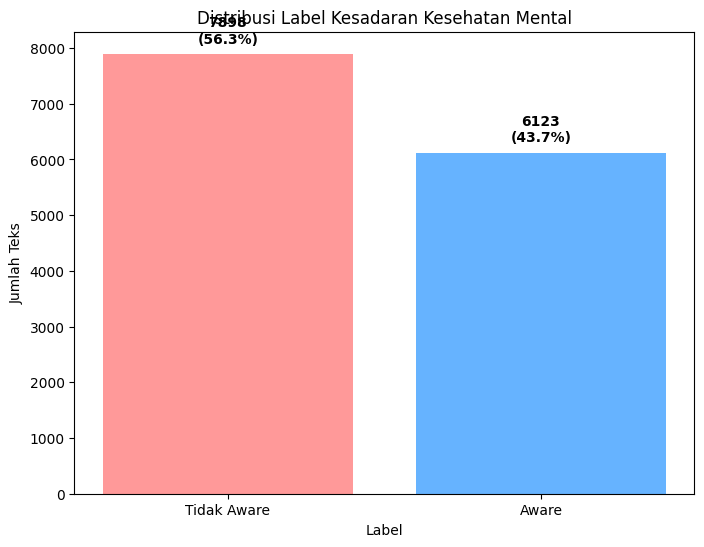

In [14]:
# 8. Visualisasi distribusi label
plt.figure(figsize=(8, 6))
plt.bar(['Tidak Aware', 'Aware'], [not_aware_count, aware_count], color=['#ff9999', '#66b3ff'])
plt.xlabel('Label')
plt.ylabel('Jumlah Teks')
plt.title('Distribusi Label Kesadaran Kesehatan Mental')
for i, count in enumerate([not_aware_count, aware_count]):
    percentage = count / len(df) * 100
    plt.text(i, count + len(df)*0.01, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Simpan grafik
# plt.tight_layout()
# # plt.savefig('label_distribution_relaxed.png')
# plt.close()

In [15]:
# 9. Simpan dataset dengan label
output_filename = 'indonesian_texts_labeled.csv'
df.to_csv(output_filename, index=False)
print(f"\nDataset berlabel telah disimpan ke: {output_filename}")


Dataset berlabel telah disimpan ke: indonesian_texts_labeled.csv


In [ ]:
# 10. Buat dataframe yang hanya berisi informasi penting
df_labeled = df[['cid', 'text', 'normalized_text', 'label']]
df_labeled.to_csv('dataset_labeled_relaxed_simplified.csv', index=False)
print("Dataset berlabel (versi sederhana) telah disimpan ke: dataset_labeled_relaxed_simplified.csv")

In [16]:
# 11. Membuat subset validasi untuk pengecekan manual (opsional)
validation_size = min(100, len(df))
validation_indices = np.random.choice(len(df), validation_size, replace=False)
df_validation = df.iloc[validation_indices].copy()
df_validation['manual_check'] = ""  # Kolom untuk validasi manual
df_validation.to_csv('validation_subset_relaxed.csv', index=False)
print(f"Subset validasi ({validation_size} sampel) telah disimpan ke: validation_subset_relaxed.csv")

Subset validasi (100 sampel) telah disimpan ke: validation_subset_relaxed.csv


In [17]:
# 12. Analisis waktu eksekusi
end_time = time.time()
execution_time = end_time - start_time
print(f"\nProses pelabelan selesai dalam {execution_time:.2f} detik")
print(f"Selesai pada: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Proses pelabelan selesai dalam 232.72 detik
Selesai pada: 2025-05-12 03:51:43



Analisis kata kunci yang sering memicu label 'Aware':

Top 15 kata kunci dalam teks 'Aware':
- 'rasa': 208 kali (20.8%)
- 'iri': 191 kali (19.1%)
- 'diri': 165 kali (16.5%)
- 'mental': 142 kali (14.2%)
- 'psikolog': 84 kali (8.4%)
- 'cara': 81 kali (8.1%)
- 'takut': 65 kali (6.5%)
- 'sakit': 63 kali (6.3%)
- 'baik': 56 kali (5.6%)
- 'anxiety': 55 kali (5.5%)
- 'obat': 53 kali (5.3%)
- 'emosi': 47 kali (4.7%)
- 'psikiater': 45 kali (4.5%)
- 'masalah': 38 kali (3.8%)
- 'cerita': 38 kali (3.8%)

Proses pelabelan selesai!


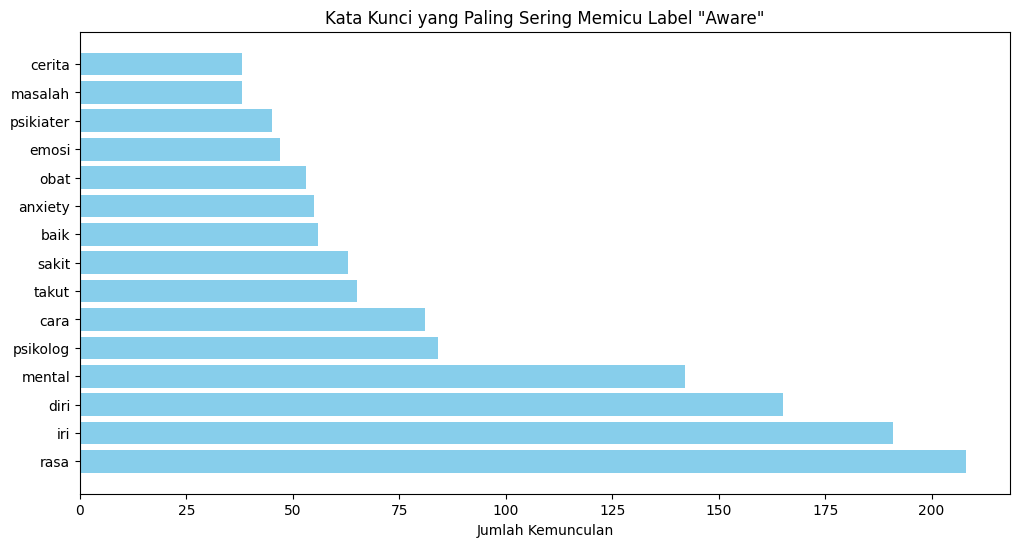

In [19]:
# 13. Analisis kata-kata kunci yang paling sering memicu label "Aware"
if aware_count > 0:
    print("\nAnalisis kata kunci yang sering memicu label 'Aware':")
    
    # Hanya analisis untuk subset dari data 'Aware' untuk efisiensi
    aware_texts = df[df['label'] == 1]['combined_text']
    sample_size = min(1000, len(aware_texts))
    if sample_size > 0:
        aware_sample = aware_texts.sample(sample_size, random_state=42)
        
        # Hitung kemunculan kata kunci
        term_count = {}
        
        # Periksa semua kategori kata kunci
        all_keywords = set(mental_health_terms + list(positive_lexicon) + list(negative_lexicon) + 
                        strong_awareness_indicators + mental_health_phrases)
        
        for term in all_keywords:
            term_count[term] = sum(1 for text in aware_sample if term in text.lower())
        
        # Ambil 15 kata kunci yang paling sering muncul
        top_terms = sorted([(term, count) for term, count in term_count.items() if count > 0], 
                            key=lambda x: x[1], reverse=True)[:15]
        
        if top_terms:
            print("\nTop 15 kata kunci dalam teks 'Aware':")
            for term, count in top_terms:
                percentage = (count / sample_size) * 100
                print(f"- '{term}': {count} kali ({percentage:.1f}%)")
            
            # Visualisasi kata kunci teratas
            plt.figure(figsize=(12, 6))
            terms = [term for term, _ in top_terms]
            counts = [count for _, count in top_terms]
            
            plt.barh(terms, counts, color='skyblue')
            plt.xlabel('Jumlah Kemunculan')
            plt.title('Kata Kunci yang Paling Sering Memicu Label "Aware"')
            # plt.tight_layout()
            # plt.savefig('top_keywords_relaxed.png')
            # plt.close()
        else:
            print("Tidak ditemukan kata kunci yang signifikan.")

print("\nProses pelabelan selesai!")